# TEST NOTEBOOK

In [1]:
import os
os.chdir("..")

import pandas as pd
from utils import ROOT_DIR, plot_series

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

READ DATA

In [5]:
data = pd.read_excel(ROOT_DIR + '/data/Historico acciones.xlsx')
data.sort_values('Date', inplace = True)

In [6]:
data.head()

Nemotecnico       Date  Quantity       $ Volum  Close price  Max price  \
0  PFBCOLOM   2020-10-09    159771  4.038280e+09      25300.0    25300.0   
1  PFBCOLOM   2020-10-13   1004966  2.465825e+10      24580.0    25200.0   
2  PFBCOLOM   2020-10-14    958577  2.338765e+10      24760.0    24760.0   
3  PFBCOLOM   2020-10-15    651960  1.593465e+10      24400.0    24570.0   
4  PFBCOLOM   2020-10-16    358315  8.836055e+09      24730.0    24750.0   

   Avg. Price  Min Price  variat  $ variat  
0    25275.43    25150.0  0.0048     120.0  
1    24536.40    24310.0 -0.0285    -720.0  
2    24398.30    24020.0  0.0073     180.0  
3    24441.14    24300.0 -0.0145    -360.0  
4    24660.02    24300.0  0.0135     330.0

In [7]:
data.describe()

Quantity       $ Volum  Close price     Max price    Avg. Price  \
count  3.094000e+03  3.094000e+03   3094.00000   3094.000000   3094.000000   
mean   9.528060e+05  4.455778e+09  15997.93775  15857.136522  15900.386697   
std    3.351664e+06  9.171985e+09  16111.15277  16233.802105  16083.443958   
min    0.000000e+00  0.000000e+00    193.10000      0.000000      0.000000   
25%    3.383350e+04  2.544954e+08   4300.00000   4140.000000   4219.087500   
50%    1.255985e+05  1.266830e+09  10820.00000  10700.000000  10776.205000   
75%    4.048372e+05  4.798388e+09  24327.50000  24552.500000  24340.827500   
max    8.864471e+07  2.245649e+11  83400.00000  83400.000000  83097.080000   

         Min Price       variat     $ variat  
count   3094.00000  3094.000000  3094.000000  
mean   15539.73956     0.018579    13.807886  
std    15923.72737     0.751177   394.067522  
min        0.00000    -7.890000 -2460.000000  
25%     4090.00000    -0.008775   -60.000000  
50%    10600.00000     0.000000     0.000000  
75%    24000.00000     0.011300    85.000000  
max    81950.00000     8.090000  4800.000000

In [49]:
# companies
data['Nemotecnico'].unique()

array(['PFBCOLOM  ', 'MINEROS', 'CONCONCRET', 'CORFICOLCF', 'PFCEMARGOS',
       'CNEC      ', 'BCOLOMBIA ', 'BVC       ', 'CELSIA    ',
       'CEMARGOS  ', 'ETB       ', 'TERPEL', 'BOGOTA    ', 'GRUPOARGOS',
       'GEB       ', 'PFDAVVNDA ', 'NUTRESA   ', 'ISA       ',
       'PFGRUPOARG', 'ECOPETROL ', 'PFAVAL    ', 'ICOLCAP   ',
       'PFGRUPSURA', 'GRUPOSURA ', 'PROMIGAS  '], dtype=object)

In [48]:
# number of companies 
data['Nemotecnico'].nunique()

25

<AxesSubplot:xlabel='Close price', ylabel='Count'>

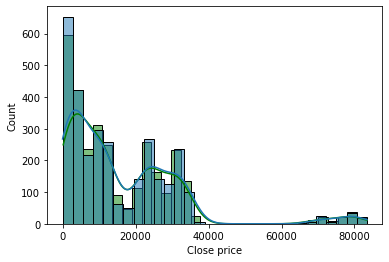

In [22]:
# overall close price and max price distribution
sns.histplot(data['Close price'], kde=True, color='g')
sns.histplot(data['Max price'], kde=True)


# Exploratory analysis

In [41]:
close_price = pd.pivot_table(data, values='Close price', index='Date', columns='Nemotecnico')

In [46]:
close_price

Nemotecnico  BCOLOMBIA   BOGOTA      BVC         CELSIA      CEMARGOS    \
Date                                                                      
2020-10-09      25980.0     68500.0     10900.0      4640.0      4645.0   
2020-10-13      24600.0     67200.0     10900.0      4600.0      4530.0   
2020-10-14      24980.0     65100.0     10900.0      4640.0      4580.0   
2020-10-15      24300.0     67990.0     10840.0      4541.0      4565.0   
2020-10-16      24330.0     67990.0     11000.0      4600.0      4560.0   
...                 ...         ...         ...         ...         ...   
2021-03-31      28750.0     78000.0     12010.0      4651.0      5150.0   
2021-04-05      29360.0     78800.0     11990.0      4729.0      5195.0   
2021-04-06      29430.0     78950.0     11980.0      4714.0      5300.0   
2021-04-07      30000.0     78930.0     12040.0      4714.0      5300.0   
2021-04-08      30300.0     77230.0     12040.0      4673.0      5300.0   

Nemotecnico  CNEC        CONCONCRET  CORFICOLCF  ECOPETROL   ETB         ...  \
Date                                                                     ...   
2020-10-09       9895.0       336.4     25810.0      1938.0       203.0  ...   
2020-10-13      10010.0       338.0     25880.0      1900.0       200.0  ...   
2020-10-14      10020.0       333.0     25790.0      1890.0       199.0  ...   
2020-10-15      10040.0       333.0     25780.0      1879.0       196.0  ...   
2020-10-16      10130.0       342.0     25990.0      1880.0       196.0  ...   
...                 ...         ...         ...         ...         ...  ...   
2021-03-31      10420.0       475.0     32730.0      2366.0       221.0  ...   
2021-04-05      10480.0       465.0     32230.0      2325.0       221.0  ...   
2021-04-06      10380.0       471.5     32200.0      2289.0       221.0  ...   
2021-04-07      10400.0       471.0     32600.0      2337.0       221.0  ...   
2021-04-08      10480.0       473.0     32400.0      2281.0       221.0  ...   

Nemotecnico  MINEROS  NUTRESA     PFAVAL      PFBCOLOM    PFCEMARGOS  \
Date                                                                   
2020-10-09    3700.0     22200.0       905.0     25300.0      3825.0   
2020-10-13    3610.0     22200.0       890.1     24580.0      3780.0   
2020-10-14    3570.0     22150.0       875.1     24760.0      3780.0   
2020-10-15    3570.0     21880.0       905.0     24400.0      3780.0   
2020-10-16    3570.0     22200.0       900.0     24730.0      3794.0   
...              ...         ...         ...         ...         ...   
2021-03-31    4430.0     23170.0      1144.0     29180.0      4080.0   
2021-04-05    4430.0     22870.0      1154.0     29900.0      4091.0   
2021-04-06    4348.0     23290.0      1159.0     29820.0      4105.0   
2021-04-07    4275.0     23310.0      1155.0     30100.0      4145.0   
2021-04-08    4230.0     22920.0      1147.0     30380.0      4120.0   

Nemotecnico  PFDAVVNDA   PFGRUPOARG  PFGRUPSURA  PROMIGAS    TERPEL  
Date                                                                 
2020-10-09      27000.0      9525.0     18460.0      7190.0  8290.0  
2020-10-13      26490.0      9290.0     18460.0      7150.0  8305.0  
2020-10-14      25990.0      9225.0     18100.0      7150.0  8370.0  
2020-10-15      25500.0      9000.0     18000.0      7340.0  8250.0  
2020-10-16      25930.0      9140.0     17630.0      7380.0  8380.0  
...                 ...         ...         ...         ...     ...  
2021-03-31      29850.0      9500.0     18940.0      7500.0  7750.0  
2021-04-05      30120.0      9500.0     18920.0      7645.0  7750.0  
2021-04-06      30420.0      9360.0     18800.0      7645.0  7750.0  
2021-04-07      30680.0      9595.0     18950.0      7670.0  7760.0  
2021-04-08      30840.0      9690.0     18750.0      7400.0  7895.0  

[119 rows x 25 columns]

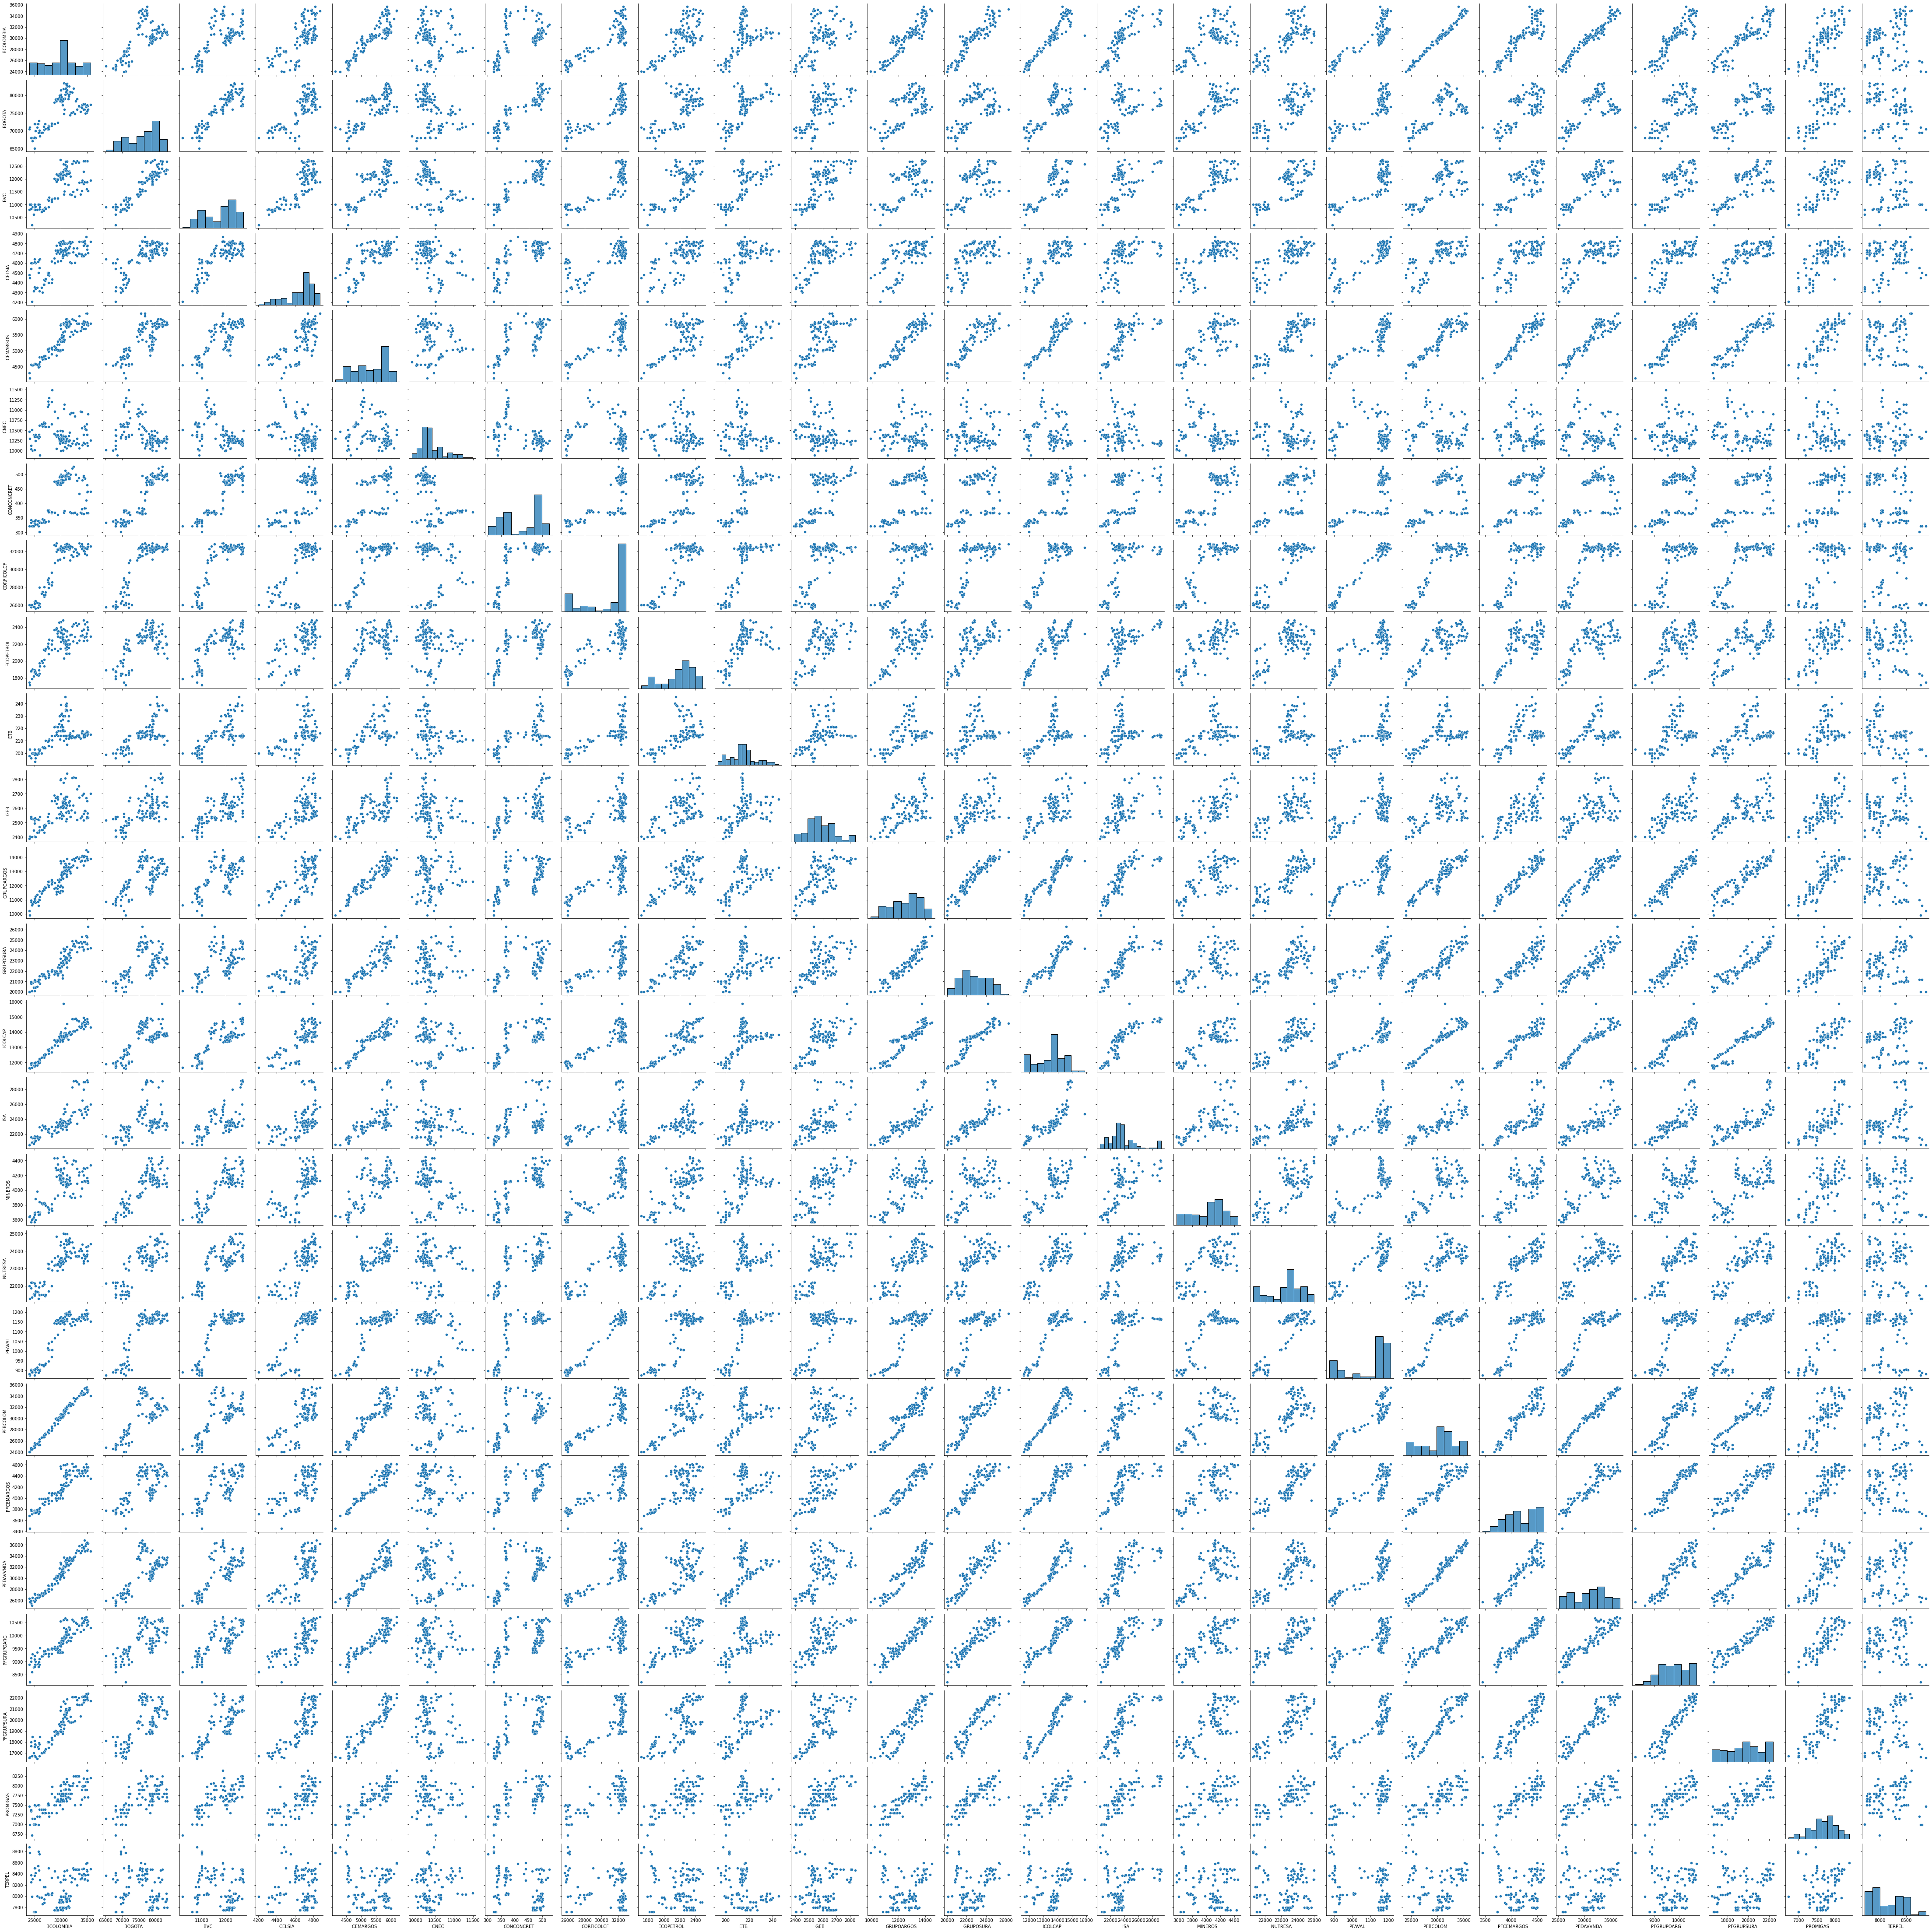

In [58]:
sns.pairplot(close_price)

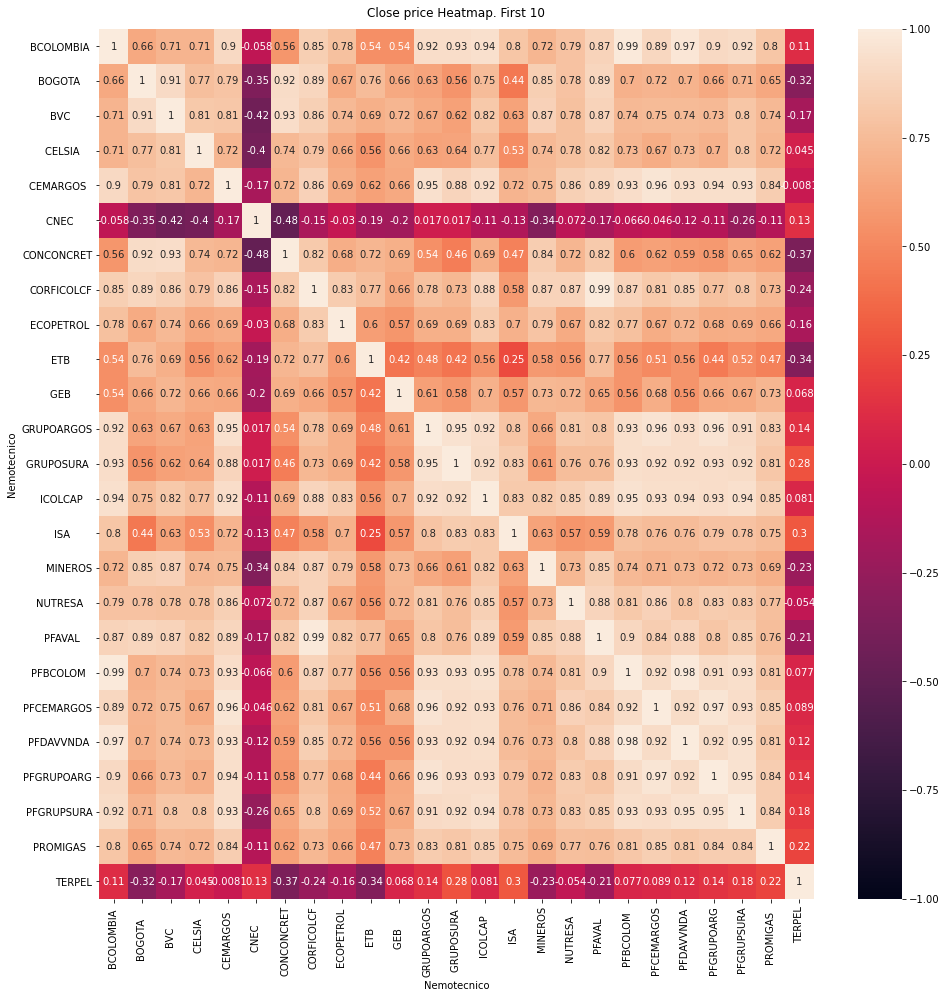

In [61]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 16))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(close_price.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Close price Heatmap. First 10', fontdict={'fontsize':12}, pad=12);

In [ ]:
sns.histplot

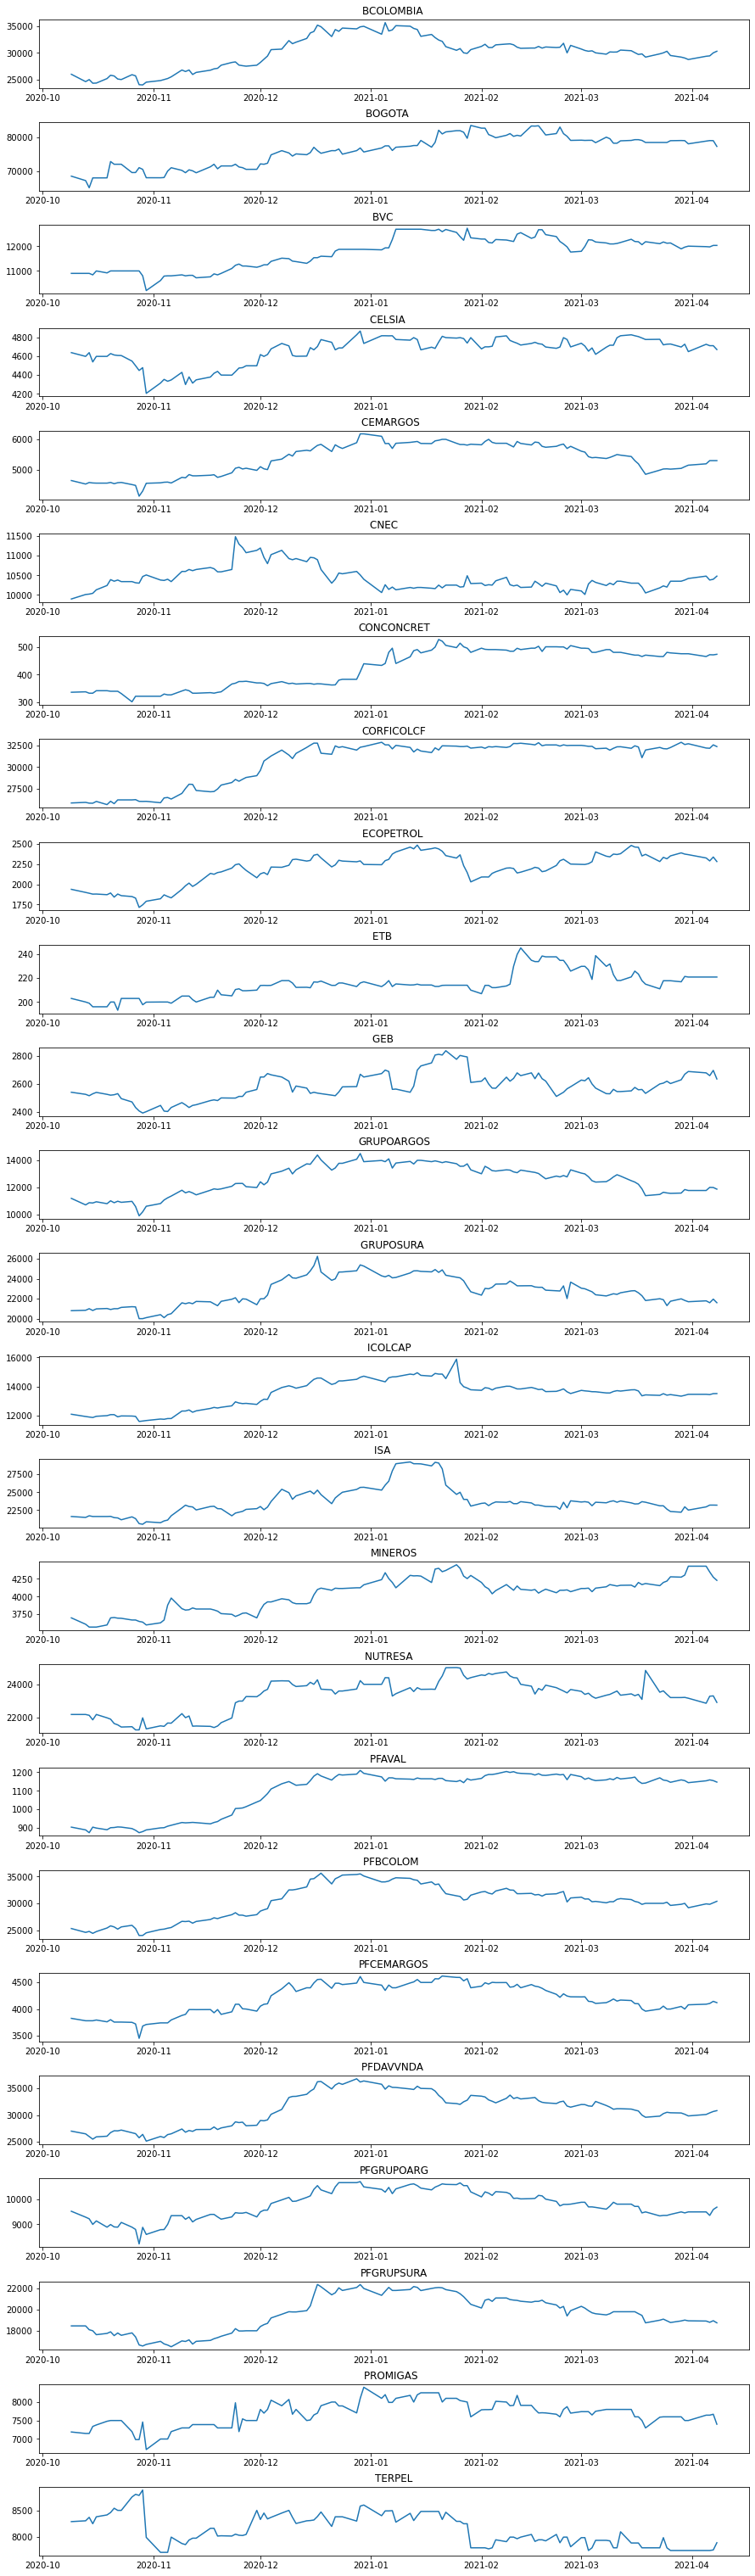

In [66]:
fig, axs = plt.subplots(25, 1, figsize=(15, 55), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(close_price.shape[1]):
    axs[i].plot(close_price.iloc[:, [i]])
    axs[i].set_title(close_price.columns[i])

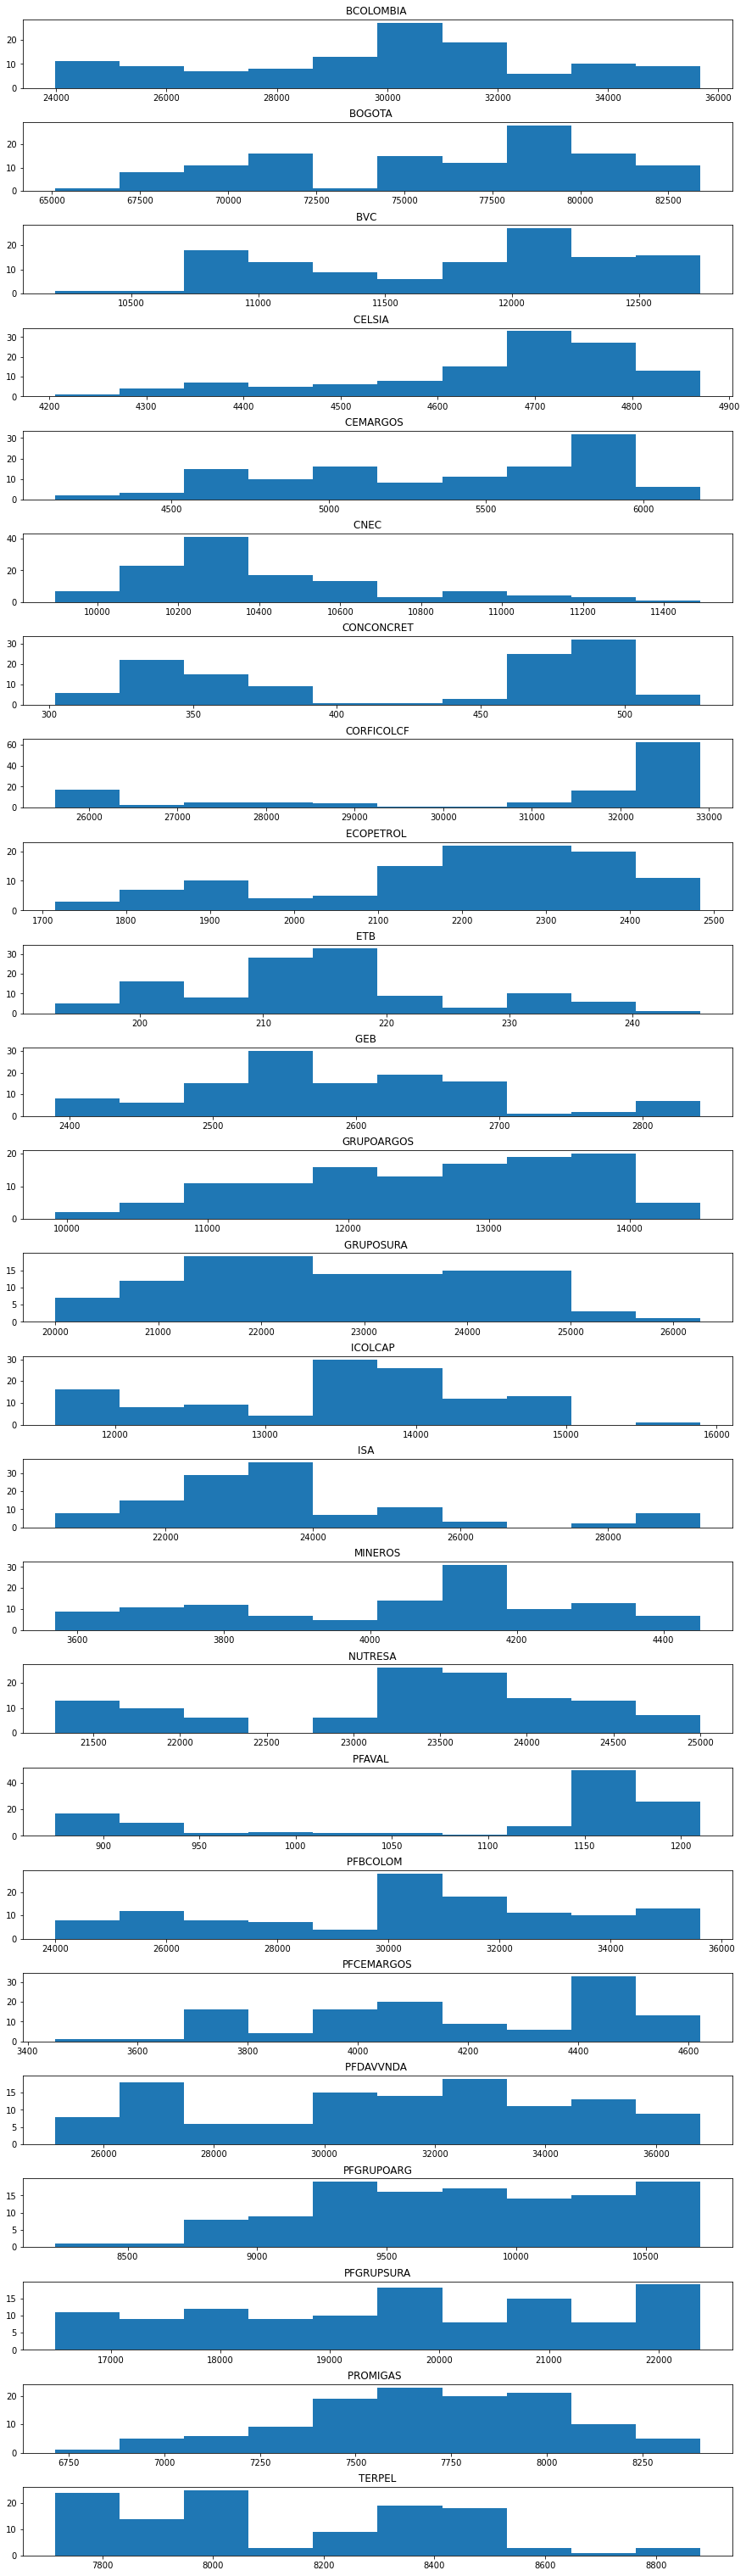

In [62]:
fig, axs = plt.subplots(25, 1, figsize=(15, 55), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(close_price.shape[1]):

    axs[i].hist(close_price.iloc[:, [i]])
    axs[i].set_title(close_price.columns[i])

In [45]:
close_price.describe().T

count          mean          std      min       25%      50%  \
Nemotecnico                                                                 
BCOLOMBIA    119.0  29935.378151  3045.383500  23980.0  27680.00  30300.0   
BOGOTA       119.0  76135.462185  4542.665489  65100.0  72000.00  77300.0   
BVC          119.0  11761.932773   645.377668  10200.0  11170.00  11940.0   
CELSIA       119.0   4657.773109   146.378106   4206.0   4602.00   4700.0   
CEMARGOS     119.0   5352.092437   519.662619   4131.0   4940.00   5435.0   
CNEC         119.0  10416.176471   310.043536   9895.0  10215.00  10340.0   
CONCONCRET   119.0    424.691597    69.211313    302.1    362.75    465.0   
CORFICOLCF   119.0  30699.831933  2545.185213  25620.0  28455.00  32200.0   
ECOPETROL    119.0   2195.252101   188.957991   1715.0   2122.00   2242.0   
ETB          119.0    214.988235    10.944917    193.1    209.50    214.1   
GEB          119.0   2584.369748    98.752461   2390.0   2525.00   2570.0   
GRUPOARGOS   119.0  12567.016807  1079.459084   9915.0  11780.00  12780.0   
GRUPOSURA    119.0  22732.773109  1420.569189  20000.0  21650.00  22700.0   
ICOLCAP      119.0  13470.857143   949.742059  11600.0  12801.50  13673.0   
ISA          119.0  23685.882353  1992.328257  20510.0  22625.00  23380.0   
MINEROS      119.0   4032.521008   233.619815   3570.0   3825.00   4100.0   
NUTRESA      119.0  23293.193277  1007.774804  21280.0  22885.00  23490.0   
PFAVAL       119.0   1096.079832   112.980637    875.1   1005.50   1156.0   
PFBCOLOM     119.0  30250.672269  3171.109716  24000.0  27795.00  30620.0   
PFCEMARGOS   119.0   4192.084034   282.123112   3450.0   3990.00   4169.0   
PFDAVVNDA    119.0  31079.747899  3167.290577  25130.0  28055.00  31500.0   
PFGRUPOARG   119.0   9786.050420   563.027859   8220.0   9360.00   9800.0   
PFGRUPSURA   119.0  19625.798319  1717.898053  16490.0  18050.00  19780.0   
PROMIGAS     119.0   7683.445378   330.337365   6715.0   7500.00   7705.0   
TERPEL       119.0   8136.932773   289.301547   7715.0   7895.00   8050.0   

                  75%      max  
Nemotecnico                     
BCOLOMBIA    31670.00  35670.0  
BOGOTA       79220.00  83400.0  
BVC          12255.00  12740.0  
CELSIA        4762.00   4870.0  
CEMARGOS      5830.00   6180.0  
CNEC         10550.00  11490.0  
CONCONCRET     489.90    526.3  
CORFICOLCF   32455.00  32900.0  
ECOPETROL     2335.00   2484.0  
ETB            218.55    245.5  
GEB           2649.50   2840.0  
GRUPOARGOS   13425.00  14500.0  
GRUPOSURA    23950.00  26260.0  
ICOLCAP      14023.00  15890.0  
ISA          24105.00  29250.0  
MINEROS       4192.50   4450.0  
NUTRESA      23995.00  25000.0  
PFAVAL        1173.00   1210.0  
PFBCOLOM     32465.00  35620.0  
PFCEMARGOS    4455.00   4621.0  
PFDAVVNDA    33350.00  36800.0  
PFGRUPOARG   10265.00  10710.0  
PFGRUPSURA   20970.00  22380.0  
PROMIGAS      7910.00   8400.0  
TERPEL        8380.00   8880.0